In [1]:
import numpy as np

In [2]:
import pymc3 as pm

In [3]:
import theano.tensor as tt

In [312]:
import pandas as pd

In [1]:
# X, y = pm.linear_training_data()

In [7]:

with pm.Model() as sleep_model:
    
    # Create the alpha and beta parameters
    # Assume a normal distribution
    alpha = pm.Normal('alpha', mu=0.0, tau=0.05, testval=0.0)
    beta = pm.Normal('beta', mu=0.0, tau=0.05, testval=0.0)
    
    # The sleep probability is modeled as a logistic function
    p = pm.Deterministic('p', 1. / (1. + tt.exp(beta * time + alpha)))
    
    # Create the bernoulli parameter which uses observed data to inform the algorithm
    observed = pm.Bernoulli('obs', p, observed=sleep_obs)
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Draw the specified number of samples
    sleep_trace = pm.sample(N_SAMPLES, step=step);

NameError: name 'time' is not defined

In [9]:
alpha+1

Elemwise{add,no_inplace}.0

In [10]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))


In [11]:
model.basic_RVs

[mu ~ Normal, obs ~ Normal]

In [12]:
mu

mu ~ Normal

In [19]:
obs.logp({"mu": 0})

array(-146.83706287)

In [ ]:
model.

In [677]:
import matplotlib.pyplot as plt

In [678]:
def gauss(x, sig=1, mu=0):
    return 1/sig * 1/np.sqrt(2*np.pi) * np.exp(-(x**2/2/sig**2))

In [679]:
x = np.random.randn(1000000)
y = np.random.randn(1000000)
z = np.random.randn(1000000)

In [680]:
r = np.sqrt(x**2 + y**2 + z**2)
pos = np.hstack((x,y,z))

In [681]:
# X, Y = np.meshgrid(x,y)

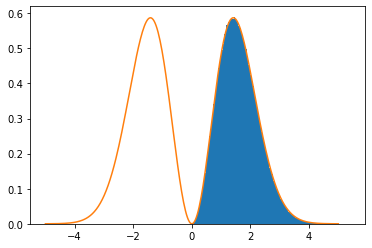

In [683]:
hst = plt.hist(r, bins=200, density=True)
plt.plot(np.linspace(-5,5, 300), 2*np.linspace(-5,5, 300)**2*gauss(np.linspace(-5,5, 300)))

In [710]:
X, Y = np.meshgrid(np.linspace(-5,5, 300), np.linspace(-5,5, 300))
P_true = gauss(X)*gauss(Y)

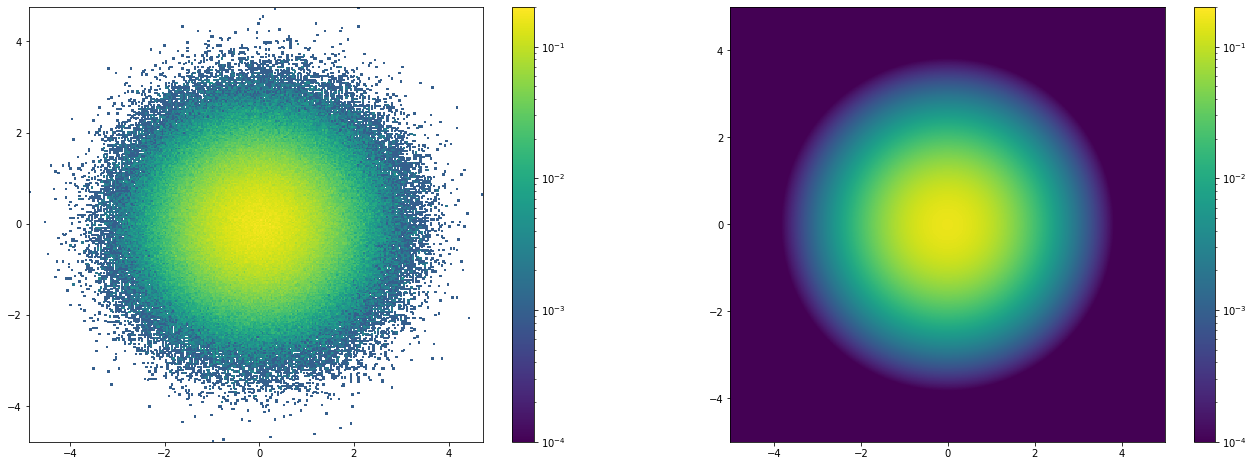

In [711]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8*2*1.4,8))
im1 = ax1.hist2d(x,y, bins=300, density=True, norm=LogNorm(vmin=1e-4, vmax=2e-1))[-1]
fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(P_true, extent=[-5,5,-5,5], norm=LogNorm(vmin=1e-4, vmax=2e-1))
fig.colorbar(im2, ax=ax2)

In [712]:
# fig, ax = plt.subplots(1, figsize=(8*1.2,8))


In [713]:
def gaussian_integ_sphere_indef(Rad, prtcl_pos_r, h=1, m=1):
#     Rad_h = Rad/h
#     pos_r_h = prtcl_pos_r/h
    from scipy.special import erf
    # from scipy.integrate import quad
    from numpy import pi, sqrt, exp
    R, r = np.meshgrid(prtcl_pos_r, Rad, copy=True)
    R, r = R.squeeze(), r.squeeze()
    h, m = np.asarray(h), np.asarray(m)
#     r =r.T
#     print(r,h)
    r /= h
    R /= h
    ans = ( erf((r - R)/sqrt(2)) + erf((r + R)/sqrt(2)) ) /2 - ( (exp(-1/2 *(r - R)**2) - exp(-1/2 *(r + R)**2)) ) /sqrt(2*pi)/R
    ans *= m
    return ans

In [714]:
# x = (np.random.rand(1000000)-.5)*5
# y = (np.random.rand(1000000)-.5)*5
# z = (np.random.rand(1000000)-.5)*5

In [715]:
Rad_bin_edge_1 = np.linspace(0.02, .9e0, 30)

In [716]:
# Rad_bin_edge_1

In [717]:
Rad_bin_edge_2 = np.logspace(0,np.log10(5),50)
Rad_bin_edge_2 = np.delete(Rad_bin_edge_2,[1,3,5,7])

In [718]:

# Rad_bin_edge_2

In [719]:
Rad_bin_edge = np.concatenate([Rad_bin_edge_1, Rad_bin_edge_2])

In [720]:
Rad_bin_edge = np.insert(Rad_bin_edge,0,0)

In [721]:
Rad_bin_edge.sort()
# Rad_bin_edge

In [722]:
Rad_bin_cen = (Rad_bin_edge[1:] * Rad_bin_edge[:-1])**(1/2)

In [730]:
mass_profile_cumm_indv = gaussian_integ_sphere_indef(Rad_bin_edge, r[:200000], h=.05, m=1) #m=gauss(r)[:500000])

In [731]:
mass_profile_cumm_bar = mass_profile_cumm_indv.sum(axis=1)
# mass_profile_cumm_bar

In [738]:
mass_profile_bar = np.diff(mass_profile_cumm_bar)/2e5

In [739]:
pnt_prt = np.histogram(r[:200000], Rad_bin_edge)[0]

In [740]:
sph_prt = np.diff(mass_profile_cumm_bar)

In [741]:
# pd.DataFrame(data={'pnt':pnt_prt, 'sph':sph_prt})

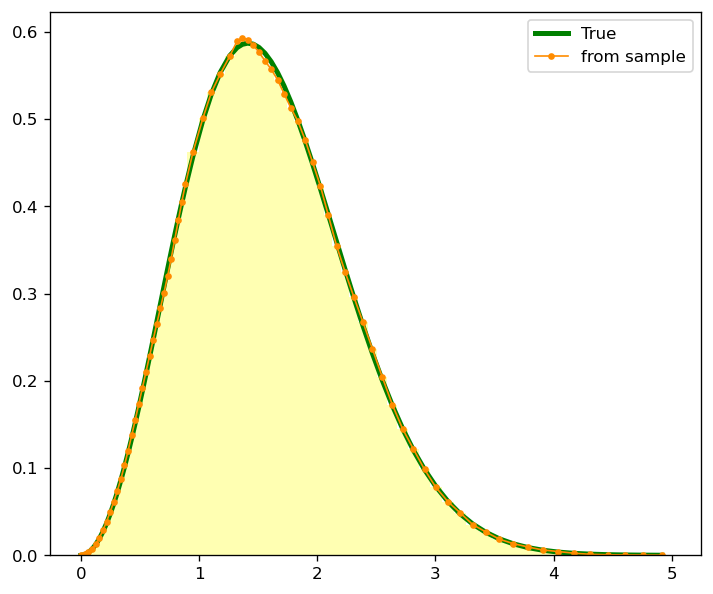

In [780]:
# plt.bar(Rad_bin_edge[1:], mass_profile_bar/np.diff(Rad_bin_edge), color='lightblue', align='edge' )
plt.figure(figsize=(7,6), dpi=120)
plt.bar(Rad_bin_cen, mass_profile_bar/np.diff(Rad_bin_edge), width=np.diff(Rad_bin_edge), color='yellow', align='center', alpha=0.3 )
plt.plot(Rad_bin_cen, 2*gauss(Rad_bin_cen)*Rad_bin_cen**2, c='g', lw=3, label='True')
plt.plot(Rad_bin_cen, mass_profile_bar/np.diff(Rad_bin_edge), color='darkorange', marker='.', lw=1, label='from sample' )
plt.legend()

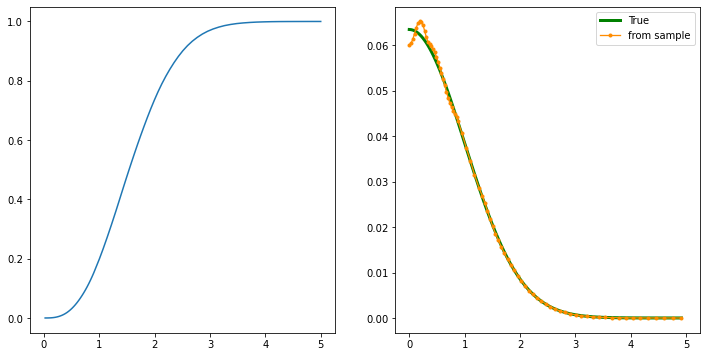

In [781]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), sharex=True)
ax1.plot(Rad_bin_edge[1:], np.cumsum(mass_profile_bar))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile_bar/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )
# r_rho_is_vir = interp1d(rhor, Rad_bin_cen, fill_value='extrapolate')(1)
ax2.plot(Rad_bin_cen, 1/2/np.pi * gauss(Rad_bin_cen), c='g', lw=3, label='True')
ax2.plot(Rad_bin_cen, rhor, color='darkorange', marker='.', lw=1.3, label='from sample')
# ax2.axhline(1)
# ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile_bar)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))
# r_vir = interp1d(rhoR, Rad_bin_edge[1:], fill_value='extrapolate')(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
# ax3.plot(Rad_bin_edge[1:], rhoR ,)
# ax3.axhline(1)
# ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
# ax3.scatter(r_vir,1)
# ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
ax2.legend()
plt.show()

In [782]:
# r = np.linspace(-5,5, 300)
# r = Rad_bin_cen
# plt.plot(Rad_bin_cen, gauss(Rad_bin_cen))

In [746]:
!hostname

hpc034


In [747]:
import scipy.stats as st

In [748]:
# generate observed data
X = st.norm(loc=30, scale=1).rvs(size=3000)

In [749]:
X = np.random.rand(3000)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [mu]


Sampling 3 chains for 1_000 tune and 200 draw iterations (3_000 + 600 draws total) took 1 seconds.
<ipython-input-750-99e18a3ff2b1>:10: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


<AxesSubplot:title={'center':'mu'}>

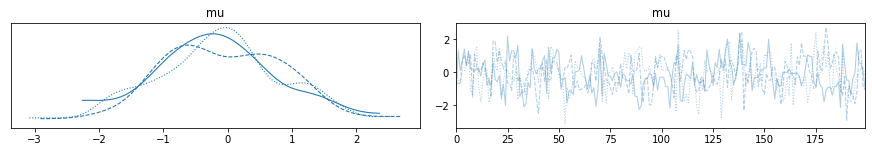

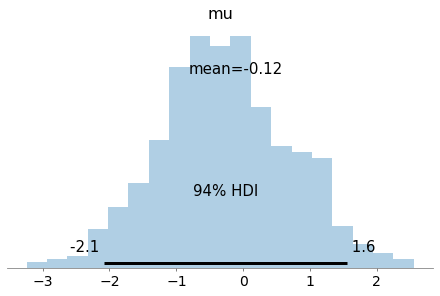

In [750]:
with pm.Model() as model:

    prior = pm.Normal('mu', mu=0, sigma=1)  # prior
#     obs = pm.Normal('obs', mu=prior, sigma=1, observed=X)  # likelihood
#     step = pm.Metropolis()

    # sample with 3 independent Markov chains
    trace = pm.sample(draws=200, chains=3, return_inferencedata=True)  

pm.traceplot(trace)
pm.plot_posterior(trace, kind="hist")

In [751]:
prior

mu ~ Normal

In [752]:
obs

obs ~ Normal

In [753]:
trace

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:title={'center':'mu'}>

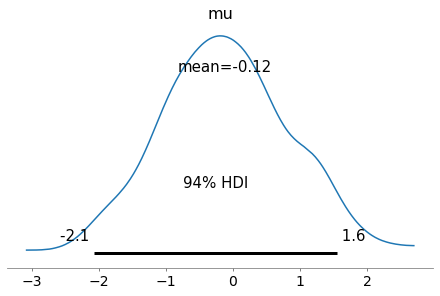

In [754]:
pm.plot_posterior(trace)

In [64]:
with pm.Model() as model:
    nm = pm.Normal('nm')

In [93]:
smpl = nm.random(1000,10000)

<BarContainer object of 200 artists>

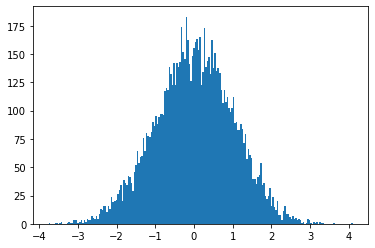

In [94]:
plt.hist(smpl, 200)[-1]

In [96]:
nrm = st.norm()

In [100]:
nrm.cdf(3)

0.9986501019683699

In [783]:
class IsoTherm(st.rv_continuous):
    def __init__(self, a=5, cutoff=30):
        super(IsoTherm, self).__init__()
        self.a1 = a
        self.R = cutoff
    def _pdf(self, x):
        A = self.R - self.a1 * np.arctan(self.R/self.a1)
#         print(A)
#         prob = 
        return x**2/(x**2+self.a1**2) / A * np.heaviside(x,1) #* np.heaviside(-(x-self.R),1) #if x>0 else 0 #np.exp(-x**2)
    def _cdf(self, x):
        A = self.R - self.a1 * np.arctan(self.R/self.a1)
        return (x - self.a1 * np.arctan(x/self.a1) )/ A
        

In [784]:
np.heaviside(-2+30,1)

1.0

In [785]:
ist = IsoTherm(1,5)

In [786]:
ist.pdf(.5)

0.05514808423745336

In [787]:
ist.cdf(3)

0.48280885619853076

In [788]:
# np.sqrt(np.pi)

In [789]:
ist.cdf(10)

2.351754847339912

In [790]:
smpl = ist.rvs(size=20000)

In [791]:
rval =  np.linspace(0,6,50)

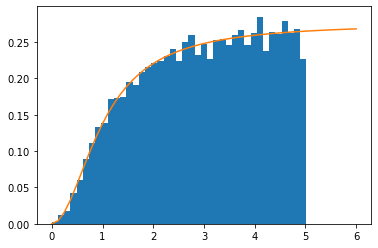

In [792]:
plt.hist(smpl, bins=rval, density=True)
plt.plot(rval,ist.pdf(rval))

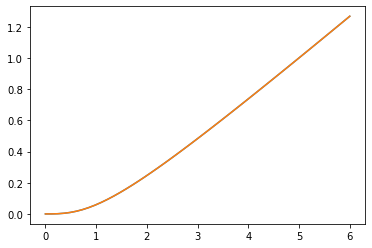

In [793]:
plt.plot(rval,ist._cdf(rval))
plt.plot(rval,ist.cdf(rval))

In [794]:
np.trapz(ist.pdf(rval), rval)

1.266851672013794

In [795]:
# np.save("isot_smpl.npy", smpl)

In [796]:
np.heaviside(0.001,3)

1.0

In [797]:
# r = ist.rvs(size=100000)

In [798]:
r = smpl.copy()
thet = st.uniform(0,np.pi).rvs(size=r.shape[0])
phi = st.uniform(0,2*np.pi).rvs(size=r.shape[0])

In [799]:
x, y, z = sphr_to_cart(r,thet,phi)
pos = np.hstack((x,y,z))

In [831]:
mass_profile_cumm_indv = gaussian_integ_sphere_indef(Rad_bin_edge, r, h=.5, m=1) #m=gauss(r)[:500000])

In [832]:
mass_profile_cumm_bar = mass_profile_cumm_indv.sum(axis=1)
# mass_profile_cumm_bar

In [833]:
mass_profile_bar = np.diff(mass_profile_cumm_bar)/r.shape[0]

In [834]:
# pnt_prt = np.histogram(r, Rad_bin_edge)[0]

In [835]:
# sph_prt = np.diff(mass_profile_cumm_bar)

In [836]:
# pd.DataFrame(data={'pnt':pnt_prt, 'sph':sph_prt})

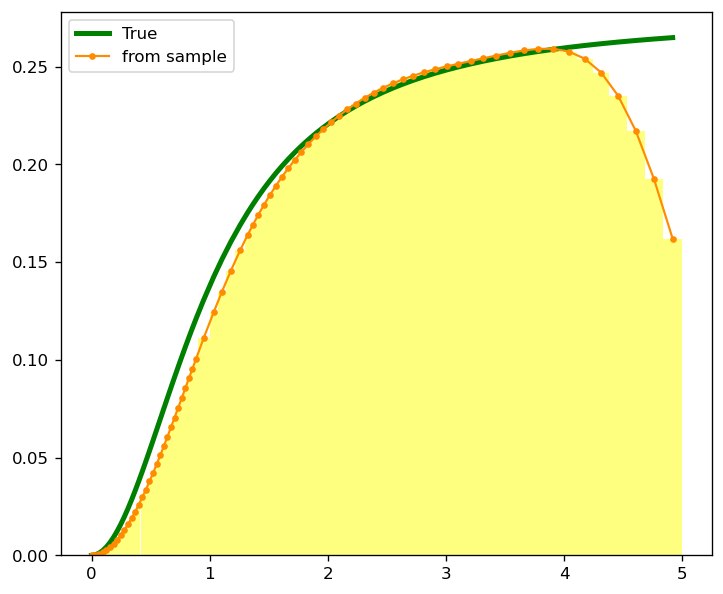

In [839]:
plt.figure(figsize=(7,6), dpi=120)
plt.bar(Rad_bin_cen, mass_profile_bar/np.diff(Rad_bin_edge), width=np.diff(Rad_bin_edge), color='yellow', align='center', alpha=0.5  )
plt.plot(Rad_bin_cen, ist._pdf(Rad_bin_cen), c='g', lw=3, label='True')
plt.plot(Rad_bin_cen, mass_profile_bar/np.diff(Rad_bin_edge), color='darkorange', marker='.', lw=1.3, label='from sample' )
plt.legend()

In [653]:
# r.shape

In [250]:
r = st.uniform(0,10).rvs(size=1000000)
thet = st.uniform(0,np.pi).rvs(size=1000000)
phi = st.uniform(0,2*np.pi).rvs(size=1000000)

(array([ 309., 1220., 1803., 2069., 2266., 2337., 2472., 2507., 2526.,
        2491.]),
 array([ 0.25277967,  3.22730959,  6.2018395 ,  9.17636942, 12.15089934,
        15.12542926, 18.09995917, 21.07448909, 24.04901901, 27.02354893,
        29.99807885]),
 <BarContainer object of 10 artists>)

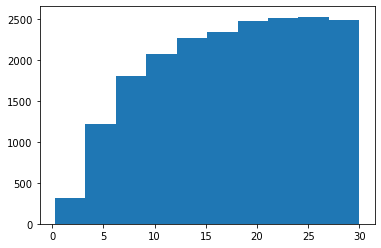

In [650]:
plt.hist(r)

In [253]:
def sphr_to_cart(r,theta,phi):
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z

In [555]:
x, y, z = sphr_to_cart(r,thet,phi)
pos = np.hstack((x,y,z))

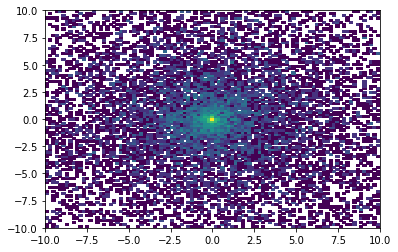

In [556]:
plt.hist2d(x,y, bins=np.linspace(-10,10,100), density=True, norm=LogNorm())[-1]

In [264]:
from matplotlib.colors import LogNorm